# Quantum circuit construction of the Markovian evolution of one emitter coupled to a plasmonic nanocavity

## Starting point: The Markovian Master Equation


After performing the Markovian approximation on the total system, we get to the ME for the system's reduced density operator:


\begin{align*}
\frac{d\rho_S}{dt} = -i[H_S + H_{LS}, \rho_S] + \mathcal{D}_{0} [\rho_S]
\end{align*} 


where


\begin{align*}
H_S + H_{LS} = \left[ \omega +  \Delta \left( \frac{g^2}{\left( \frac{\kappa}{2}\right)^2 + (\Delta)^2}\right)\right] \sigma^{\dag} \sigma
\end{align*} 



\begin{align*}
\mathcal{D} [\rho_S] = \left( \gamma + \kappa \frac{ g^2 }{\left( \frac{\kappa}{2}\right)^2 + (\Delta)^2} \right) \left( \sigma \rho_S \sigma^{\dag} - \frac{1}{2} \left\lbrace \sigma^{\dag} \sigma, \rho_S \right\rbrace \right)
\end{align*} 


with $\omega, \omega_c$ the frequencies of the emitter and the cavity, respectively, $g$ the coupling strength, $\gamma$ the spontanous decay rate of the emitter, $\kappa$ the cavity losses onto the environment and $\Delta \equiv \omega - \omega_c$ the detuning between the two.

Defining the effective variables $\tilde{\omega} \equiv \omega+ \Delta \left( \frac{g^2 }{\left( \frac{\kappa}{2}\right)^2 + (\Delta)^2}\right)$, $\tilde{\gamma} \equiv \gamma + \kappa \frac{g^2}{\left( \frac{\kappa}{2}\right)^2 + (\Delta)^2}$, we can rewrite the ME as (writing $\rho$ instead of $\rho_S$ for clarity)( NOTE TO SELF: This last notation simplification is also done in section 3.4.2 of Breuer)


\begin{align*}
\frac{d\rho}{dt} = -i[\tilde{\omega}\sigma^{\dag} \sigma, \rho] + \tilde{\gamma} \left( \sigma \rho \sigma^{\dag}- \frac{1}{2} \{ \sigma^{\dag}\sigma, \rho \} \right)
\end{align*} 


This ME contains two different types of evolution: an unitary one under the superoperator $-i[H, \rho]$ and a dissipative one under $\mathcal{D}[\rho]$. Let's see how to implement each one as quantum circuits separately.

## Unitary evolution.

The generator of the Hamiltonian evolution is the operator $U(t) = \exp(-iHt)$. In our particular case,

\begin{align*}
U(t) = \exp \left( -i\omega \sigma^{\dag} \sigma t\right)
\end{align*}

In terms of Pauli matrices (using that $\sigma \equiv (X - i Y)/2$
),

\begin{align*}
U(t) = \exp \left( -\frac{i\omega t}{2} \left[ \mathbb{1} + Z \right] \right) = \exp \left( - \frac{i\omega t}{2} Z \right)
\end{align*}

where we used the fact that $[\mathbf{1}, Z] = 0$ and $\exp \left( -i\alpha t \mathbf{1} \right) =  \mathbf{1} \exp \left( -i\alpha t\right)$ (and this last term is just a global factor in the operator that can be omitted)

Identifying the resulting exponential as the rotation gate $R_Z (\alpha)$ for $\alpha = \omega t$ (see Nielsen and Chuang section 4.2), we can readily implement the evolution operator $U(t)$ as the quantum gate $U_{\text{gate}}$

\begin{align*}
U_{\text{gate}} (t) = R_Z(\alpha(t)
)
\end{align*}

without the need of Trotterization.

## Dissipative dynamics.

Unlike the unitary evolution, implementing the evolution superoperator $D(t) = \exp \left(\mathcal{D} t \right)$ is not a straightforward thing to do. Over the years, many algorithmic techniques have been used for simulating dissipation as Stochastic wavefunction methods or Variational quantum algorithms. In our approach, we will seek to find a dilated unitary operator $U_{dilated}$ acting on an enlarged Hibert space such that when tracing out the ancillary (auxiliary) system, we can reproduce the desired non-unitary dynamics on the system of interest. To derive this dilated operator, we will use Kraus operators and quantum channels formalism (later on we will see that we do not actually need the explicit expression of $U_{dilated}$, it is enough to compute its Kraus representation).

### Effect of the dissipator on the density operator

Our starting point will be to see what effect the dissipator $\mathcal{D} [\rho]$ has on the system density operator to see which kind of quantum channel we need to define. In this simple case, this can be done straightforwardly through standard matrix product.


\begin{align*}
\mathcal{D} [\rho_S] = \left( \gamma + g^2 \frac{\kappa}{\left( \frac{\kappa}{2}\right)^2 + (\Delta)^2} \right) \left( \sigma \rho_S \sigma^{\dag} - \frac{1}{2} \left\lbrace \sigma^{\dag} \sigma, \rho_S \right\rbrace \right) \rightarrow \begin{pmatrix}
\gamma \rho_{11} & -\frac{\gamma}{2} \rho_{01} \\
-\frac{\gamma}{2} \rho_{10} & -\gamma \rho_{11}
\end{pmatrix}
\end{align*} 

Since we are only interested in the purely dissipative dynamics of the density operator, we can set $H$ to zero just momentarily in the ME and get


\begin{align*}
\frac{d\rho}{dt} = \mathcal{D} [\rho_S]  \rightarrow
\frac{d}{dt} \begin{pmatrix}
\rho_{00} & \rho_{01} \\
\rho_{10} & \rho_{11}
\end{pmatrix} = \begin{pmatrix}
\gamma \rho_{11} & -\frac{\gamma}{2} \rho_{01} \\
-\frac{\gamma}{2} \rho_{10} & -\gamma \rho_{11}
\end{pmatrix}.
\end{align*} 

From the expression above we can derive a system of differential equations for the matrix elements of the density operator 

\begin{cases}
\frac{d \rho_{00}}{dt} = \gamma \rho_{11} \\
\frac{d \rho_{01}}{dt} = - \frac{\gamma}{2} \rho_{01} \\
\frac{d \rho_{10}}{dt} = - \frac{\gamma}{2} \rho_{10} \\
\frac{d \rho_{11}}{dt} = - \gamma \rho_{11}
\end{cases}

with solutions

\begin{align*}
\rho_{00} (t) &= \rho_{00} (0) + \rho_{11}(0) \left( 1 - e^{-\gamma t} \right) \\
\rho_{01} (t) &= \rho_{01} (0) e^{-\frac{\gamma}{2} t} \\
\rho_{10} (t) &= \rho_{10} (0) e^{-\frac{\gamma}{2} t} \\
\rho_{11}(t) &= \rho_{11} (0) e^{-\gamma t}
\end{align*}

Interpreting the diagonal elements of the density operator as the populations of states $\left| 0\right> ( \rho_{00})$ and $\left| 1\right> ( \rho_{11})$, one may infer that the effect of the dissipator on the system is to transfer population from the state $\left| 1\right>$ to $\left| 0 \right>$ at rate $1 - e^{-\gamma t}$, i.e., it is modelling the spontaneous decay of an emitter with decay rate $\gamma$.

### Probabilistic interpretation. Amplitude damping channels (ADCs)

The decay that the dissipator $\mathcal{D}[\rho]$ induces on the system physically involves releasing a photon onto the environment. Let's consider then an enlarged Hilbert space $\mathcal{H} = \mathcal{H}_S \otimes \mathcal{H}_E$ where $S$ denotes the system and $E$, its environment Let's say we let the total system evolve from some instant $t$ to $t + \Delta t$, for some $\Delta t$. Under the exclusive action of the dissipator $\mathcal{D}$, there is some probability $p$ that the system decays from $\left| 1 \right>_S $ to $\left| 0 \right>_S$, releasing a photon in the process, therefore making the environment transition from $\left|0\right>_E$ to $\left| 1 \right>_E$. This process can be described through a quantum channel $\varepsilon$ with transformation equations

\begin{align*}
\left| 0 \right>_S \otimes \left|0 \right>_E &\to \left| 0 \right>_S \otimes \left|0 \right>_E \\
\left| 1 \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- p} \left| 1 \right>_S \otimes \left|0 \right>_E +  \sqrt{p} \left| 0 \right>_S \otimes \left|1 \right>_E
\end{align*}

Assuming the quantum channel $\varepsilon$ to be Completely Positive and Trace Preserving (CPTP) (we can check this later on), it admits a Kraus decomposition

\begin{align*}
\varepsilon [\rho] = \sum_i K_i \rho K_i^{\dag}
\end{align*}

where $K_i \in H_S$ are the __Kraus operators__ representing the channel satisfying the completeness relation $\sum_i K_i^{\dag} K_i = \mathbb{1}$.

Let's see how to derive the Kraus representation of the channel from the transformation equations. Let's start by defining an __isometric extension__ or __Stinespring dilation__(see [1](#references)) $V$ that maps states from the reduced system space $\mathcal{H}_S$ to the enlarged Hilbert space $\mathcal{H}_S \otimes \mathcal{H}_E$ according to the transformation equations for the channel, 

\begin{align*}
V \left| 0 \right>_S &= \left|0 \right>_S \otimes \left|0 \right>_E \\
V \left| 1 \right>_S &= \sqrt{1- p} \left| 1 \right>_S \otimes \left|0 \right>_E +  \sqrt{p} \left| 0 \right>_S \otimes \left|1 \right>_E
\end{align*}

Note that this is in fact an isometry because it is a linear operator of the form $V: \mathbb{C}^{2} \to \left( \mathbb{C}^{2} \right)^{\otimes 2}$ such that $V^{\dag} V = \mathbf{1}$ (this last property actually ensures complete positivity). Equivalently, it admits a matrix representation with orthonormal columns

NOTE TO SELF?: This isometry is a rectangular matrix that contains a subset of columns of the $U_{dilated}$ (see [2](#references)).


NOTE TO SELF: Check that $V^{\dag} V = \mathbb{1}$ ensures complete positivity (look for a reference at least)

\begin{align*}
V_{00} &= _S\left< 0 \right| V \left| 0 \right>_S = \left< 0 \right| \left. 0 \right>_S \otimes \left| 0 \right>_E \to \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\
V_{01} &= _S\left< 0 \right| V \left| 1 \right>_S = \sqrt{1-p}  \cancel{\left< 0 \right| \left. 1 \right>_S} \otimes \left| 0 \right>_E  + \sqrt{p} \left< 0 \right| \left. 0 \right>_S \otimes \left| 1 \right>_E \to \begin{pmatrix} 0 \\ \sqrt{p} \end{pmatrix} \\
V_{10} &= _S\left< 1 \right| V \left| 0 \right>_S = \cancel{\left< 1 \right| \left. 0 \right>_S} \otimes \left| 0 \right>_E \to \begin{pmatrix} 0 \\ 0 \end{pmatrix} \\
V_{11} &= _S\left< 1 \right| V \left| 1 \right>_S = \sqrt{1-p} \left< 1 \right| \left. 1 \right>_S \otimes \left| 0 \right>_E  + \sqrt{p}  \cancel{\left< 1 \right| \left. 0 \right>_S} \otimes \left| 1 \right>_E \to \begin{pmatrix} \sqrt{1-p} \\ 0 \end{pmatrix}

\end{align*}

As a result,

\begin{align*}

V \to 
\begin{pmatrix} 
V_{00} & V_{01} \\
V_{10} & V_{11}
\end{pmatrix} = 
\begin{pmatrix} 
1 & 0 \\
0 & \sqrt{p} \\
0 & \sqrt{1-p} \\
0 & 0 

\end{pmatrix}
\end{align*}

Now, since $V$ is an isometric extension of $\varepsilon[\rho] = \sum_i K_i \rho K_i^{\dag}$, we have $V =  \sum_i K_i \otimes \left|i\right>_E$, with $ \{ \left|i\right>_E \}$ some orthonormal basis of $\mathcal{H}_E$ (see [1](#references)). Or, equivalently, $K_i = \left( \mathbf{1}_S \otimes \left< i \right|_E \right) V$ (intuitively, the projection $\mathbf{1}_S \otimes \left<i \right|_E $ selects the component of $V$ that corresponds to the $i$-th basis state in the environment). Since in our case $\mathcal{H}_E$ is two-dimensional, we will have two Kraus operators $K_0, K_1$.


One can easily compute the matrix elements of these two operators in the system space. For example,

\begin{align*}
(K_0)_{00} = _S\left< 0 \right| \mathbb{1}_S \otimes _E\left< 0 \right| V  \left| 0 \right>_S = _S\left< 0 \right| \otimes \left(  \left| 0 \right>_S \left< 0 \right| \left. 0 \right>_E\right) = \left< 0 \right| \left. 0 \right>_S \otimes \left< 0 \right| \left. 0 \right>_E = 1.
\end{align*}

Repeating this process for all four elements of each matrix, we arrive at the Kraus representation of the channel,

\begin{align*}
K_0 = \begin{pmatrix}
1 & 0 \\
0 & \sqrt{1-p}
\end{pmatrix} \hspace{20mm}
K_1 = \begin{pmatrix}
0 & \sqrt{p} \\
0 & 0
\end{pmatrix}
\end{align*}

In ket-bra notation,

\begin{align*}
K_0 = \left| 0 \right> \left< 0 \right| + \sqrt{1-p} \left| 1 \right> \left< 1 \right| \\
K_1 = \sqrt{p} \left|0 \right> \left< 1 \right|
\end{align*}

Finally, it is straightforward to check that $K_0^{\dag} K_0 + K_1^{\dag} K_1 = \mathbf{1}$ (ensuring trace preservation).

This particular channel is widely known in quantum communication and information theory as the __amplitude damping channel__ (ADC).

### Connecting the ME formalism with the Kraus decomposition.


We saw previously that, under the quantum channel $\varepsilon$, $\rho$ evolves as

\begin{align*}
\rho(t) = \sum_i K_i \rho(0) K_i^{\dag}
\end{align*}

Assumming a general initial state $\rho(0) = \begin{pmatrix} \rho_{00}(0) & \rho_{01}(0) \\\rho_{10}(0) & \rho_{11}(0) \end{pmatrix}$ we arrrive (using simple matrix product) at

\begin{align*}
\begin{pmatrix}
\rho_{00} (t) & \rho_{01} (t) \\
\rho_{10} (t) & \rho_{11} (t)
\end{pmatrix} = 

\begin{pmatrix}
\rho_{00} (0) + p \rho_{11}(0) & \sqrt{1-p} \rho_{01}(0) \\
\sqrt{1-p} \rho_{10} (0) & (1-p) \rho_{11}
\end{pmatrix}
\end{align*}

which gives us the evolution of each matrix element of the density operator $\rho$

\begin{align*}
\rho_{00} (t) &= \rho_{00} (0) + p\rho_{11}(0)  \\
\rho_{01} (t) &= \rho_{01} (0) \sqrt{1-p} \\
\rho_{10} (t) &= \rho_{10} (0) \sqrt{1-p} \\
\rho_{11}(t) &= \rho_{11} (0) (1-p)
\end{align*}

A quick comparison of the evolution of these elements under the amplitude damping channel $\varepsilon$ with the one give by the dissipator $\mathcal{D}$ in the Markovian ME, allows the connection of the transition probability $p$ with the spontaneous decay rate $\gamma$ as $p = 1 - e^{-\gamma t}$.

To sum everything up, this connection of the ADC with the ME lets us model the dissipator $\mathcal{D}$ by implementing a quantum circuit that produces the transformation equations defined above. This can be done just by infering quantum gates from the transformation equations, without the need of an analytical expression of $U_{dilated}$. More complex dissipators (or channels) would not allow this inference and therefore the exact expression of $U_{dilated}$ would most likely be needed.

### Quantum circuit construction of the ADC.


We seek to implement the following trasnformation equations

\begin{align*}
\left| 0 \right>_S \otimes \left|0 \right>_E &\to \left| 0 \right>_S \otimes \left|0 \right>_E \\
\left| 1 \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- p} \left| 1 \right>_S \otimes \left|0 \right>_E +  \sqrt{p} \left| 0 \right>_S \otimes \left|1 \right>_E
\end{align*}

The enlargement of the Hilbert space will imply a widening of the circuit, due to the additional `QuantumRegister` containing the ancilla qubit. Remember that this qubit does not need to represent anything physical, it is included just so that the total transformation $U_{\text{dilated}}$ is unitary (and therefore implementable as a `QuantumCircuit`). The quantum circuit implementing this $U_{\text{dilated}}$ must be one that after tracing over this auxiliary register, outputs the system desired state $\rho$.



First, notice how the circuit should leave the state $\left| 0 \right>_S $ untouched while putting $\left| 1 \right>_S$ in a particular superposition of $\left| 0 \right>_S$ and $\left| 1 \right>_S$. The first idea of acting exclusively when the system is in $\left| 1 \right>_S$ suggests using a controlled gate. Additionally, the amplitudes $\sqrt{1-p}$ and $\sqrt{p}$ suggest using a $R_y (\theta)$ gate with $\theta$ satisfying $\sin \theta = \sqrt{p}$, since 

\begin{align*}
R_y (\theta) \left| 0 \right> = \cos \theta \left|0 \right> + \sin \theta \left| 1 \right>
\end{align*} 

Finally, notice how in the last summand of the second equation, when the environment is in $\left| 1 \right>$, the system state is flipped from $\left| 1 \right>$ to $\left| 0 \right>$. This suggests using a CX gate on the system, controlled by the ancilla. 

Putting everything together, the circuit modeling $\varepsilon$ (and therefore $\mathcal{D}$) is the one below.

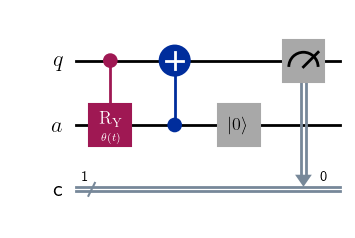

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

system = QuantumRegister(1, 'q')
ancilla = QuantumRegister(1, 'a')
classical = ClassicalRegister(1, 'c')

theta = Parameter('$\\theta (t)$') 

qc = QuantumCircuit(system, ancilla, classical)
qc.cry(theta, system, ancilla)
qc.cx(ancilla, system)
qc.reset(ancilla)
qc.measure(system, classical)

a = qc.draw('mpl')
a.savefig('figs/fig1b.svg', bbox_inches='tight')
a

Here the reset operation on the ancilla register mimics the partial trace operation over the environment degrees of freedom in the ME formalism.



## Extra: Studying the evolution of the matrix elements under ME and QC evolution.

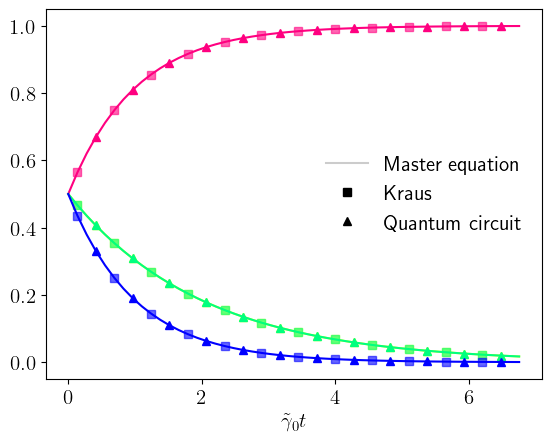

In [7]:
from qutip import sigmam, sigmap, basis, mesolve
import numpy as np
from utils.get_kraus_TEST import get_kraus
from sympy import Matrix, sqrt, zeros
from sympy.physics.quantum import TensorProduct
from utils.generate_complementary_colors import generate_complementary_colors
from qutip import Qobj, ptrace, tensor

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600
plt.rcParams.update({'font.size': 15})


omega_m = 1.2
omega_c = 1.1
gamma = 0.8*(10**-6)
kappa = 0.2
g = 0.03
delta = omega_m - omega_c
gamma_eff = gamma + (kappa*(g**2))/((0.5*kappa)**2 + delta**2)

t = np.linspace(0, 750, 50)

h = 0*sigmam()
rho0 = (1/np.sqrt(2))*(basis(2,1) + basis(2,0))
lind = np.sqrt(gamma_eff)*sigmam()
obs = sigmap()*sigmam()

result = mesolve(h, rho0, t, lind, obs, options = {'store_states' : True})
ME_density_matrices = [ state if state.isoper else state.proj() for state in result.states ]

############
ket_0 = Matrix([[1],[0]])
ket_1 = Matrix([[0],[1]])

cx = Matrix([[1, 0, 0, 0],
             [0, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]])
# cx = Matrix([[1, 0, 0, 0],
#               [0, 1, 0, 0],
#               [0, 0, 0, 1],
#               [0, 0, 1, 0]])


kraus_reset = [Matrix([[1, 0],[0, 0]]), Matrix([[0, 1],[0, 0]])]
dilated_kraus_reset = [TensorProduct(Matrix([[1,0],[0,1]]), k) for k in kraus_reset]

kraus_density_matrices = []
qc_density_matrices = []

for instant in t:
    p = 1 - np.exp(-gamma_eff*instant)
    theta = 2*np.arcsin(np.sqrt(p))

    # cry = Matrix([[1, 0, 0, 0],
    #               [0, np.cos(theta/2), 0, -np.sin(theta/2)],
    #               [0, 0, 1, 0],
    #               [0, np.sin(theta/2), 0, np.cos(theta/2)]])
    
    cry = Matrix([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, np.cos(theta/2), -np.sin(theta/2)],
                  [0, 0, np.sin(theta/2), np.cos(theta/2)]])

    first_prime = TensorProduct(ket_0, ket_0) 
    second_prime = sqrt(1-p)*TensorProduct(ket_1, ket_0) + sqrt(p)*TensorProduct(ket_0, ket_1)

    transformed_kets = [first_prime, second_prime]
    base = 'computational'
    system_dim = 2
    ancilla_dim = 2

    kraus = get_kraus(transformed_kets, base, system_dim, ancilla_dim, False)

    rho = ME_density_matrices[0]
    rho = kraus[0]*rho*kraus[0].transpose() + kraus[1]*rho*kraus[1].transpose()
    rho_to_np_array = np.array(rho, dtype = complex)
    kraus_density_matrices.append(np.abs(rho_to_np_array))

    ##########

    #initial_state = tensor(rho0, basis(2,1))
    #rho = Matrix(initial_state*initial_state.dag())
    rho = TensorProduct(Matrix(ME_density_matrices[0]), Matrix([[1, 0],[0, 0]]))
    rho = cry*rho*cry.transpose()
    rho = cx*rho*cx.transpose()
    rho = dilated_kraus_reset[0]*rho*dilated_kraus_reset[0].transpose() + dilated_kraus_reset[1]*rho*dilated_kraus_reset[1].transpose()
    rho_to_qobj = Qobj(rho)
    reduced_rho = ptrace(Qobj(rho, dims=[[2, 2], [2, 2]]), 0)
    reduced_rho_to_np_array = reduced_rho.full()
    qc_density_matrices.append(np.abs(reduced_rho_to_np_array))


#colors = generate_complementary_colors(4, 'default', 'maroon')
colors = generate_complementary_colors(4, 'neon', 'hotpink')
tags = ['00', '01', '10', '11']
counter = 0
for i in range(2):
    for j in range(2):
        if (i,j) == (0,0):
            ME_elements = [ np.abs(ME_density_matrices[idx].full())[1][1] for idx in range(len(t))]
        elif (i,j) == (1,1):
            ME_elements = [ ME_density_matrices[idx][0][0] for idx in range(len(t))]
        else:
            ME_elements = [ ME_density_matrices[idx][i][j] for idx in range(len(t))]
        kraus_elements = [ kraus_density_matrices[idx][i][j] for idx in range(len(t))]
        qc_elements = [ qc_density_matrices[idx][i][j] for idx in range(len(t))]

        adim_t = gamma_eff*t
        # plt.plot(t[0:-3:3], ME_elements[0:-3:3], color = colors[counter], linestyle = 'none', marker = 'o', markersize = 6, alpha = 0.2)
        plt.plot(adim_t, ME_elements, color = colors[counter], linestyle = 'solid', markersize = 6)
        plt.plot(adim_t[1:-2:4], kraus_elements[1:-2:4], color = colors[counter], linestyle = 'none', marker = 's', alpha = 0.6)
        plt.plot(adim_t[3:-1:4], qc_elements[3:-1:4], color = colors[counter], linestyle = 'none', marker = '^')
        #plt.plot(np.NaN, np.NaN, color = colors[counter], linestyle = 'none', marker = 'o', label = f'$\\rho_{{{i}{j}}} (t)$')

        counter = counter + 1
plt.plot(np.NaN, np.NaN, color = 'black', linestyle = 'solid', label = f'Master equation', alpha = 0.2)
plt.plot(np.NaN, np.NaN, color = 'black', linestyle = 'none', marker = 's', label = f'Kraus')
plt.plot(np.NaN, np.NaN, color = 'black', linestyle = 'none', marker = '^',label = f'Quantum circuit')
plt.xlabel('$\\tilde{\\gamma}_0 t$')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
plt.legend(frameon=False)
plt.savefig('figs/fig1c_rescaled.svg', format='svg', bbox_inches='tight', transparent = True)
plt.show()

In [6]:
from qutip import sigmam, sigmap, basis, mesolve, destroy, qeye, tensor
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600
plt.rcParams.update({'font.size': 15})

omega_m = 1.2
omega_c = 1.1
gamma = 0.8*(10**-6)
kappa = 0.2
g = 0.03
t = np.linspace(0, 750, 50)

h_orig = omega_m*tensor(sigmap()*sigmam(), qeye(2)) + omega_c*tensor(qeye(2), destroy(2).dag()*destroy(2)) + g*(tensor(sigmap(), destroy(2)) + tensor(sigmam(), destroy(2).dag()))
rho0_orig = tensor(basis(2,0), basis(2,1))
lind_orig = [ np.sqrt(gamma)*tensor(sigmam(), qeye(2)), np.sqrt(kappa)*tensor(qeye(2), destroy(2)) ]
obs_orig = tensor(sigmap()*sigmam(), qeye(2))

result_orig = mesolve(h_orig, rho0_orig, t, lind_orig, obs_orig)

delta = omega_m - omega_c
gamma_eff = gamma + (kappa*(g**2))/((0.5*kappa)**2 + delta**2)
omega_eff = omega_m + (delta*(g**2))/((0.5*kappa)**2 + delta**2)

h = omega_eff*sigmap()*sigmam()
rho0 = basis(2,0)
lind = np.sqrt(gamma_eff)*sigmam()
obs = sigmap()*sigmam()

result = mesolve(h, rho0, t, lind, obs)

In [14]:
kappa/4

0.05

In [10]:
gamma

8e-07

In [9]:
omega_eff, gamma_eff

(1.2045, 0.009000800000000012)

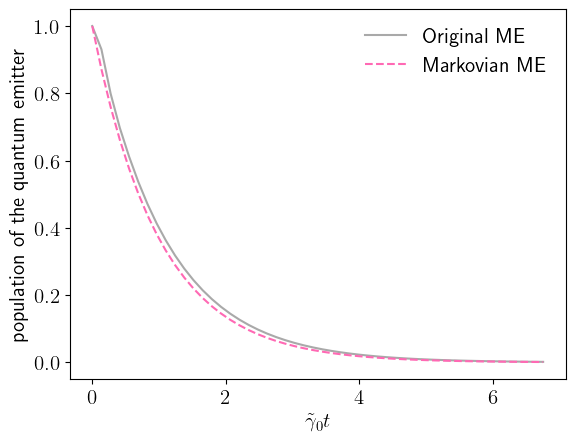

In [15]:
plt.plot(gamma_eff*t, result_orig.expect[0], color = 'darkgrey', linestyle = 'solid', label = f'Original ME')
plt.plot(gamma_eff*t, result.expect[0], color = 'hotpink', linestyle = 'dashed', label = f'Markovian ME')
plt.xlabel('$\\tilde{\\gamma}_0 t$')
plt.ylabel('population of the quantum emitter')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
plt.legend(frameon=False)
plt.savefig('figs/qutip_section.svg', bbox_inches='tight', transparent = True)
plt.show()

In [7]:
from qutip import sigmam, sigmap, basis, mesolve
import numpy as np
from utils.get_kraus_TEST import get_kraus
from sympy import Matrix, sqrt, zeros
from sympy.physics.quantum import TensorProduct
from utils.generate_complementary_colors import generate_complementary_colors
from qutip import Qobj, ptrace, tensor
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, generate_preset_pass_manager
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime.fake_provider import FakeMarrakesh
from utils.isa_cdr import get_populations

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600
plt.rcParams.update({'font.size': 15})

omega_m = 1.2
omega_c = 1.1
gamma = 0.8*(10**-6)
kappa = 0.2
g = 0.03
delta = omega_m - omega_c
gamma_eff = gamma + (kappa*(g**2))/((0.5*kappa)**2 + delta**2)
t = np.linspace(0, 750, 50)

h = 0*sigmam()
rho0 = basis(2,0)
lind = np.sqrt(gamma_eff)*sigmam()
obs = sigmap()*sigmam()
result = mesolve(h, rho0, t, lind, obs)
qutip_evs = result.expect[0]

system = QuantumRegister(1, 'q')
ancilla = QuantumRegister(1, 'a')
cbits = ClassicalRegister(1, 'c')

delta_t = Parameter('$t$') 
theta = (((1 - (-delta_t*gamma_eff).exp())**(1/2)).arcsin())*2

qc = QuantumCircuit(system, ancilla, cbits)
qc.x(system)
qc.cry(theta, system, ancilla)
qc.cx(ancilla, system)
qc.reset(ancilla)
qc.measure_all(system)

optimization_level = 3
noiseless_backend = AerSimulator()
noisy_backend = FakeMarrakesh()

pm = generate_preset_pass_manager(optimization_level, noisy_backend)
isa_qc = pm.run(qc)
pubs = [(isa_qc, x) for x in t]

exact_sampler = SamplerV2(mode = noiseless_backend)
noisy_sampler = SamplerV2(mode = noisy_backend)

exact_job = exact_sampler.run(pubs)
exact_result = exact_job.result()
exact_evs, std = get_populations(1, exact_result)

noisy_job = noisy_sampler.run(pubs)
noisy_result = noisy_job.result()
noisy_evs, std = get_populations(1, noisy_result)

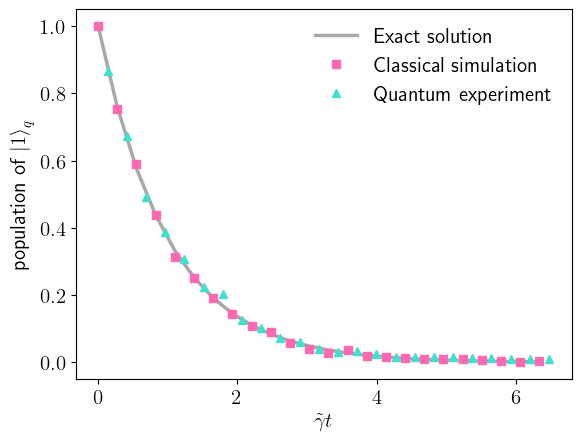

In [8]:
plt.plot(gamma_eff*t[0:-2:2], qutip_evs[0:-2:2], color = 'darkgrey', linestyle = 'solid', linewidth = 2.5, label = f'Exact solution')
plt.plot(gamma_eff*t[0:-2:2], exact_evs['0'][0:-2:2], color = 'hotpink', linestyle = 'none', marker = 's', label = f'Classical simulation')
plt.plot(gamma_eff*t[1:-1:2], noisy_evs['0'][1:-1:2], color = 'turquoise', linestyle = 'none', marker = '^',label = f'Quantum experiment')
plt.xlabel('$\\tilde{\\gamma} t$')
plt.ylabel('population of $\\left |1 \\right>_q$')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
plt.legend(frameon=False)
plt.savefig('poster_single_qubit', bbox_inches='tight')
plt.show()

pintar el abs y ponerlo en la fig


NOTE TO SELF: Maybe add to the plot the evolution of the system density matrix elements under the matrix representation of the circuit.

## One step further. Adding incoherent pumping.


In this case, the ME becomes

\begin{align*}
\frac{d\rho_S}{dt} = -i[H_S + H_{LS}, \rho_S] + \mathcal{D}_{0}(\gamma) [\rho_S] + \mathcal{D}_{0}(\Lambda) [\rho_S]
\end{align*} 

where we added the parameter dependency on the dissipators to differentiate the spontaneous decay with the pumping. This last term is defined as (see [3](#references))

\begin{align*}
\mathcal{D}_0 (\Lambda) [\rho_S] = \Lambda \left( \sigma^{\dag} \rho_S \sigma - \frac{1}{2} \left\lbrace \sigma \sigma^{\dag}, \rho_S \right\rbrace \right)
\end{align*}

where $\Lambda$ is the pumping rate.

Once again, we set $H$ and $\mathcal{D}_0 (\gamma)$ to zero just to see the effect of this new dissipator on the density matrix elements.


\begin{align*}
\frac{d\rho}{dt} = \mathcal{D}_0 (\Lambda) [\rho_S]  \rightarrow
\frac{d}{dt} \begin{pmatrix}
\rho_{00} & \rho_{01} \\
\rho_{10} & \rho_{11}
\end{pmatrix} = \begin{pmatrix}
-\Lambda \rho_{00} & -\frac{\Lambda}{2} \rho_{01} \\
-\frac{\Lambda}{2} \rho_{10} & \Lambda \rho_{00}
\end{pmatrix}.
\end{align*} 

From this, we get the following system of differential equations for the matrix elements

\begin{cases}
\frac{d \rho_{00}}{dt} = -\Lambda \rho_{00} \\
\frac{d \rho_{01}}{dt} = - \frac{\Lambda}{2} \rho_{01} \\
\frac{d \rho_{10}}{dt} = - \frac{\Lambda}{2} \rho_{10} \\
\frac{d \rho_{11}}{dt} = \Lambda \rho_{00}
\end{cases}

with solutions

\begin{align*}
\rho_{00} (t) &= \rho_{00} (0) e^{-\Lambda t} \\
\rho_{01} (t) &= \rho_{01} (0) e^{-\frac{\Lambda}{2} t} \\
\rho_{10} (t) &= \rho_{10} (0) e^{-\frac{\Lambda}{2} t} \\
\rho_{11}(t) &= \rho_{11} (0) + \rho_{00}(0) \left( 1 - e^{-\Lambda t} \right)
\end{align*}

Interpreting once again the diagonal elements of the density operator as the populations of states $\left| 0\right> ( \rho_{00})$ and $\left| 1\right> ( \rho_{11})$, one may infer that the effect of the dissipator on the system is the reverse to that of the decay i.e., to transfer population from the state $\left| 0\right>$ to $\left| 1 \right>$ at rate $1 - e^{-\Lambda t}$.

Analogously, we can define a quantum 'excitation' channel $\varphi$ in the enlarged Hilbert space $\mathcal{H}_S \otimes \mathcal{H}_E$ that performs the transformations

\begin{align*}
\left| 1 \right>_S \otimes \left|0 \right>_E &\to \left| 1 \right>_S \otimes \left|0 \right>_E \\
\left| 0 \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- q} \left| 0 \right>_S \otimes \left|0 \right>_E +  \sqrt{q} \left| 1 \right>_S \otimes \left|1 \right>_E
\end{align*}

where $q$ is the probability of exciting $\left| 0\right>_S$ to $\left| 1\right>_S$.

The Stinespring dilation of this channel $W$ admits a rectangular matrix representation

\begin{align*}

W \to 
\begin{pmatrix} 
\sqrt{1-q} & 0 \\
0 & 0 \\
0 & 1 \\
\sqrt{q} & 0 

\end{pmatrix}
\end{align*}

from which we can retrieve a set of Kraus operators for the channel $\varphi$

\begin{align*}
M_0 = \begin{pmatrix}
\sqrt{1-q} & 0 \\
0 & 1
\end{pmatrix} \hspace{20mm}
M_1 = \begin{pmatrix}
0 & 0 \\
\sqrt{q} & 0
\end{pmatrix}
\end{align*}

under which $\rho (t)$ evolves as

\begin{align*}
\rho(t) = \sum_i M_i \rho(0) M_i^{\dag} \to 
\begin{pmatrix}
\rho_{00} (t) & \rho_{01} (t) \\
\rho_{10} (t) & \rho_{11} (t)
\end{pmatrix} = 

\begin{pmatrix}
(1-q) \rho_{00} (0) & \sqrt{1-q} \rho_{01}(0) \\
\sqrt{1-q} \rho_{10} (0) & \rho_{11} (0) + q \rho_{00} (0)
\end{pmatrix}
\end{align*}

This allows us to connect the excitation probability $q$ with the pumping rate $\Lambda$ as $q = 1 - e^{-\Lambda t}$.

From the transformation equations standpoint, this dissipators works as a reverse ADC; it acts only when the system is in $\left| 0 \right>$. After that, it performs the same amplitude modifications and flips than the regular ADC. This suggest using the same quantum circuit that we used for the ADC, and simply change the controlled-$R_y(\phi)$ to an 'anti-controlled'-$R_y(\phi)$ (i.e., a controlled gate with control state set on $\left|0 \right>$ instead of the usual $\left| 1 \right>$), with $\phi$ satisfying $\sin \phi = \sqrt{q}$.

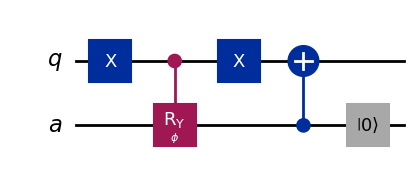

In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter

system = QuantumRegister(1, 'q')
ancilla = QuantumRegister(1, 'a')

phi = Parameter('$\\phi$') 

qc = QuantumCircuit(system, ancilla)
qc.x(system)
qc.cry(phi, system, ancilla)
qc.x(system)
qc.cx(ancilla, system)
qc.reset(ancilla)

qc.draw('mpl')

## Combining both channels (spontaneous decay and incoherent pumping)

The exclusively-dissipative ME under spontaneous decay and incoherent pumping reads

\begin{align*}
\frac{d\rho_S}{dt} = \mathcal{D}_{0}(\gamma) [\rho_S] + \mathcal{D}_{0}(\Lambda) [\rho_S]
\end{align*} 

which yields the following system of differential equations for the density matrix elements

\begin{cases}
\frac{d \rho_{00}}{dt} = \gamma \rho_{11} -\Lambda \rho_{00} \\
\frac{d \rho_{01}}{dt} = - \left( \frac{\gamma}{2} - \frac{\Lambda}{2} \right)\rho_{01} \\
\frac{d \rho_{10}}{dt} = - \left( \frac{\gamma}{2} - \frac{\Lambda}{2} \right) \rho_{10} \\
\frac{d \rho_{11}}{dt} = - \gamma \rho_{11} + \Lambda \rho_{00}
\end{cases}

With solutions

\begin{align*}
\rho_{00} (t) &= \rho_{00} (0) \left( \frac{\gamma}{\gamma + \Lambda} + \frac{\Lambda}{\gamma + \Lambda} e^{-(\gamma + \Lambda)t} \right) + \rho_{11} (0) \left(  \frac{\gamma}{\gamma + \Lambda} -   \frac{\gamma}{\gamma + \Lambda} e^{-(\gamma + \Lambda)t} \right) \\
\rho_{01} (t) &= \rho_{01} (0) e^{-\frac{(\gamma + \Lambda)}{2}t} \\
\rho_{10} (t) &= \rho_{10} (0) e^{-\frac{(\gamma + \Lambda)}{2}t} \\
\rho_{11}(t) &= \rho_{00} (0) \left( \frac{\Lambda}{\gamma + \Lambda} - \frac{\Lambda}{\gamma + \Lambda} e^{-(\gamma + \Lambda)t} \right) + \rho_{11} (0) \left(  \frac{\Lambda}{\gamma + \Lambda} +   \frac{\gamma}{\gamma + \Lambda} e^{-(\gamma + \Lambda)t} \right)
\end{align*}

For a small time evolution $t \to t + \Delta t$, the above solution can be approximated (expanding at first order the exponentials) as

\begin{align*}
\rho_{00} (t + \Delta t) & \approx \rho_{00} (t) \left( 1 - \Lambda \Delta t \right) + \rho_{11} (t) \gamma \Delta t \\
\rho_{01} ( t+ \Delta t) & \approx \rho_{01} (t) \left( 1 - \frac{(\gamma + \Lambda)}{2} \Delta t\right) \\
\rho_{10} ( t+ \Delta t) & \approx \rho_{10} (t) \left( 1 - \frac{(\gamma + \Lambda)}{2} \Delta t\right) \\
\rho_{11}( t+ \Delta t) & \approx \rho_{00} (t) \Lambda \Delta t + \rho_{11} (t) \left(  1 - \gamma \Delta t \right)
\end{align*}

Now we would like to verify once again that we can connect the results from the evolution under the ME with those obtained after evolving $\rho$ through the quantum channels $\varphi$ and $\varepsilon$. We will do this connection with too different approaches.

### First approach. Sequential application of the channels.

Starting from the Kraus demposition of $\varepsilon$ and $\varphi$ derived previously,

\begin{align*}
K_0 = \begin{pmatrix}
1 & 0 \\
0 & \sqrt{1-p}
\end{pmatrix} \hspace{20mm}
K_1 = \begin{pmatrix}
0 & \sqrt{p} \\
0 & 0
\end{pmatrix}
\end{align*}

\begin{align*}
M_0 = \begin{pmatrix}
\sqrt{1-q} & 0 \\
0 & 1
\end{pmatrix} \hspace{20mm}
M_1 = \begin{pmatrix}
0 & 0 \\
\sqrt{q} & 0
\end{pmatrix}
\end{align*}

We can define the sequential channel $\varphi \circ \varepsilon$ through his action on $\rho$ as $\varphi \circ \varepsilon [\rho] \equiv \varepsilon [ \varphi[\rho]]$. Under this channel, $\rho$ evolves from $t = 0$ to an arbitrary $t$ as

\begin{align*}
\rho(t) = \sum_i K_i \left( \sum_j M_j \rho(0) M_j^{\dag} \right) K_i^{\dag}
\end{align*}

With the matrix elements evolving as

\begin{align*}
\rho_{00} (t ) &= \rho_{00} (0) \left(p q + \left[1 -q \right] \right)+ \rho_{11} (0) p \\
\rho_{01} (t) &= \rho_{01} (0) \sqrt{1 - p} \sqrt{1 - q} \\
\rho_{10} ( t) &= \rho_{10} (0) \sqrt{1 - p} \sqrt{1 - q} \\
\rho_{11}( t) &= \rho_{00} (0) q + \rho_{11} (0) \left(p q + \left[1 -p \right] \right)
\end{align*}

This evolution is not exactly the same as the one given by the ME for arbitrary $t$, as it can be readily seeen. However, if one assumes a small time evolution $t \to t + \Delta t$ and performs the approximations $\sqrt{1 + x} \approx 1 + \frac{x}{2}$, $p = 1 - e^{-\gamma t} \approx \gamma \Delta t$ and $q \approx \Lambda \Delta t$, neglects terms of second order in $\Delta t$, then

\begin{align*}
\rho_{00} (t + \Delta t) \approx \rho_{00} (t) \left( 1 - \Lambda \Delta t \right) + \rho_{11} (t) \gamma \Delta t \\
\rho_{01} ( t+ \Delta t) \approx \rho_{01} (t) \left( 1 - \frac{(\gamma + \Lambda)}{2} \Delta t \right) \\
\rho_{10} ( t+ \Delta t) \approx \rho_{10} (t) \left( 1 - \frac{(\gamma + \Lambda)}{2} \Delta t \right) \\
\rho_{11}( t+ \Delta t) \approx \rho_{00} (t) \Lambda \Delta t + \rho_{11} (t) \left(  1 - \gamma \Delta t \right)
\end{align*}

And we get exactly the same approximate form for the evolution of the density matrix as in the ME.

### Second approach. Defining a new combined channel.

Starting from the transformation equations for each channel,

\begin{align*}
\left| 0 \right>_S \otimes \left|0 \right>_E &\to \left| 0 \right>_S \otimes \left|0 \right>_E \\
\left| 1 \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- p} \left| 1 \right>_S \otimes \left|0 \right>_E +  \sqrt{p} \left| 0 \right>_S \otimes \left|1 \right>_E
\end{align*}


\begin{align*}
\left| 1 \right>_S \otimes \left|0 \right>_E &\to \left| 1 \right>_S \otimes \left|0 \right>_E \\
\left| 0 \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- q} \left| 0 \right>_S \otimes \left|0 \right>_E +  \sqrt{q} \left| 1 \right>_S \otimes \left|1 \right>_E
\end{align*}

we can define a new channel $\psi$ commbining the effect of the previous two in a single set of transformation equations,


\begin{align*}
\left| 0 \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- q} \left| 0 \right>_S \otimes \left|0 \right>_E +  \sqrt{q} \left| 1 \right>_S \otimes \left|1 \right>_E \\ 
\left| 1 \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- p} \left| 1 \right>_S \otimes \left|0 \right>_E +  \sqrt{p} \left| 0 \right>_S \otimes \left|1 \right>_E

\end{align*}

The Kraus decomposition of this channel can be achieved through a set of operators $\left\lbrace L_0, L_1 \right\rbrace$

\begin{align*}
L_0 = \begin{pmatrix}
\sqrt{1-q} & 0 \\
0 & \sqrt{1-p}
\end{pmatrix} \hspace{20mm}
L_1 = \begin{pmatrix}
0 & \sqrt{p} \\
\sqrt{q} & 0
\end{pmatrix}
\end{align*}

which yield the evolved density matrix

\begin{align*}
\rho(t) = \sum_i L_i \rho(0) L_i^{\dag} 
\end{align*}

with matrix elements

\begin{align*}
\rho_{00} (t ) &= \rho_{00} (0) \left(1 -q \right)+ \rho_{11} (0) p \\
\rho_{01} (t) &= \rho_{01} (0) \sqrt{1 - p} \sqrt{1 - q} + \sqrt{p} \sqrt{q} \rho_{10} (0) \\
\rho_{10} ( t) &= \rho_{10} (0) \sqrt{1 - p} \sqrt{1 - q} + \sqrt{p} \sqrt{q} \rho_{01} (0) \\
\rho_{11}( t) &= \rho_{00} (0) q + \rho_{11} (0) \left(1 -p \right)
\end{align*}

Again, these equations differ both from the previous approach and the ME. However, performing the short time step approximation we did in the previous approach, we arrive at

\begin{align*}
...
\end{align*}

NOTE TO SELF: I think I am missing something (idk what) since different set of Kraus operators musst yield the same evolution of the density matrix elements, ssince although different, they represent the same physical process. As a result, I should obtain the exact same results with both approaches, not only on the small time limit. Honestly think that the first is the correct one but from delRe, it seems like the second approach is the correct one, which does not really make sense to me.

### Circuit representation 

Knowing how both circuits work for $\varepsilon$ and $\varphi$
 (leftside of the barrier), it is easy to see that the exact same transformations can be implemented through a shallower circuit (rightside of the barrier)

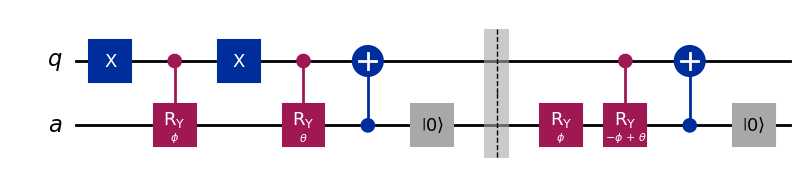

In [5]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter

system = QuantumRegister(1, 'q')
ancilla = QuantumRegister(1, 'a')

phi = Parameter('$\\phi$') 
theta = Parameter('$\\theta$')

qc = QuantumCircuit(system, ancilla)

## raw combination 

qc.x(system)
qc.cry(phi, system, ancilla)
qc.x(system)
qc.cry(theta, system, ancilla)
qc.cx(ancilla, system)
qc.reset(ancilla)

qc.barrier()

# simplified commbined channel

qc.ry(phi, ancilla)
qc.cry(theta-phi, system, ancilla)
qc.cx(ancilla, system)
qc.reset(ancilla)

qc.draw('mpl')

In this way, the $Ry(\varphi)$ goes through if the system is in the ground state (since the controlled-$R_y (\theta - \phi)$ would not activate) but it gets undone and instead $R_y (\theta)$ is applied if it is in $\left| 1 \right>_S$.

Another way to see that these two circuits are equivalent is by compairing the `Operator` associated to each of them

In [7]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter
from qiskit.quantum_info import Operator

system = QuantumRegister(1, 'q')
ancilla = QuantumRegister(1, 'a')

# Give the parameter random values

phi = 0.2
theta = 1

## raw combination 

qc1 = QuantumCircuit(system, ancilla)
qc1.x(system)
qc1.cry(phi, system, ancilla)
qc1.x(system)
qc1.cry(theta, system, ancilla)
qc1.cx(ancilla, system)

# simplified commbined channel

qc2 = QuantumCircuit(system, ancilla)
qc2.ry(phi, ancilla)
qc2.cry(theta-phi, system, ancilla)
qc2.cx(ancilla, system)

Operator.from_circuit(qc1) == Operator.from_circuit(qc2)

True

NOTE TO SELF: It is important to remakr that, without the incoherent pumping, the channel is outputting correct off-diagonal elements in rho, i.ee., is exactly replicating the spontaneous decay dissipator. It is the combinantion of it with tthe incoherent pumping that is messing things up.

### [WIP] Proving circuit equivalency using Kraus operators.

The simplified version of the circuit representing the combined channel $\varepsilon \left[ \varphi [\rho] \right]$ we obtained above is very similar to the one in [4](#rerferences).

## References <a id='references'></a>


[1] Lecture 13, October 7, 2015 on Quantum Information Theory by Professor Mark. M. Wilde

[2] Quantum Information Theory - Quantum Channels by Nicholas Evgenidze (April 1, 2024)

[3] A. Devi, et.al. Phys. Rev. A 105, 013701 (2022).

[4] L. Del Re., et. al. Phys. Rev. B 102, 125112 (2020).